In [5]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [7]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [8]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Inspect the City Data DataFrame

In [9]:
# Get the columns and the rows that are not null.
#city_data_df.count()
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [10]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [14]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [15]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

## Inspect Ride Data DataFrame


In [16]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [18]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge DataFrames

In [19]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


**N.B.** The terms **scatter plot** and **scatter chart**, as well as **bubble chart** and **bubble plot**, are often used interchangeably in the data visualization field.

## Create a DataFrame for Each Type of city

In [25]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [26]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [27]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## Get the Number of Rides for Each City Type

In [62]:
urban_ride_count=urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [63]:
suburban_ride_count=suburban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [64]:
rural_ride_count=rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

## Get the Average Fare for Each City Type

In [58]:
# Get average fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby('city').mean()['fare'] 
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [50]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare=suburban_cities_df.groupby('city').mean()["fare"] 
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [51]:
# Get average fare for each city in the rural cities.
rural_avg_fare=rural_cities_df.groupby('city').mean()["fare"] 
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

## Get the Average Number of Drivers for Each City Type

In [59]:
# Get the average number of drivers for each urban city.
urban_driver_count=urban_cities_df.groupby('city').mean()['driver_count'] 
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [60]:
# Get the average number of drivers for each suburban city.
suburban_driver_count=suburban_cities_df.groupby('city').mean()['driver_count'] 
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [61]:
# Get the average number of drivers for each rural city.
rural_driver_count=rural_cities_df.groupby('city').mean()['driver_count'] 
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

## Create Bubble Charts for Each City Type

Text(0, 0.5, 'Average Fares ($)')

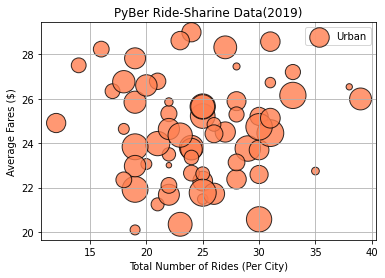

In [94]:
# Build the scatter plots for urban cities.
plt.scatter(
            urban_ride_count,
            urban_avg_fare, 
            s= 10*urban_driver_count,
            color='coral',
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban"
             )
plt.legend()
plt.grid()
plt.title("PyBer Ride-Sharine Data(2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')

Text(0, 0.5, 'Average Fares ($)')

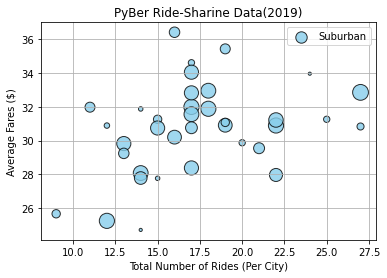

In [93]:
# Build the scatter plots for suburban cities.
plt.scatter(
            suburban_ride_count,
            suburban_avg_fare, 
            s= 10*suburban_driver_count,
            color='skyblue',
            edgecolors="black",
            linewidth=1,  
            alpha=0.8,
            label="Suburban"
             )
plt.legend()
plt.grid(True)
plt.title("PyBer Ride-Sharine Data(2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')

Text(0, 0.5, 'Average Fares ($)')

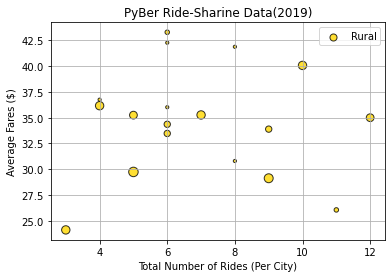

In [113]:
# Build the scatter plots for rural cities.
plt.scatter(
            rural_ride_count,
           rural_avg_fare, 
            s= 10*rural_driver_count,
            color='gold',
            edgecolors="black",
            linewidth=1,
            alpha=0.8,
            label="Rural"
             )
plt.legend()
plt.grid()
plt.title("PyBer Ride-Sharine Data(2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')

## Create Bubble Charts

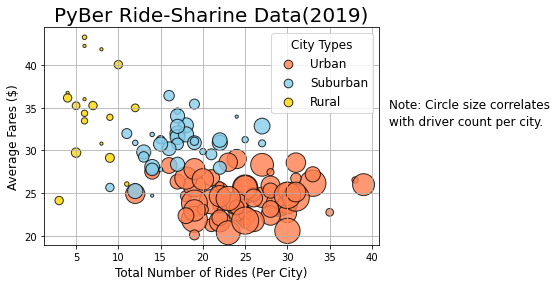

In [114]:
# Add the scatter charts for each type of city.
plt.scatter(
            urban_ride_count,
            urban_avg_fare, 
            s= 10*urban_driver_count,
            color='coral',
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban"
             )

plt.scatter(
            suburban_ride_count,
            suburban_avg_fare, 
            s= 10*suburban_driver_count,
            color='skyblue',
            edgecolors="black",
            linewidth=1,  
            alpha=0.8,
            label="Suburban"
             )

plt.scatter(
            rural_ride_count,
           rural_avg_fare, 
            s= 10*rural_driver_count,
            color='gold',
            edgecolors="black",
            linewidth=1,
            alpha=0.8,
            label="Rural"
             )


plt.grid()
plt.title("PyBer Ride-Sharine Data(2019)",fontsize=20)
plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.ylabel('Average Fares ($)',fontsize=12)

#Add the legend
#plt.legend()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.(42,35) are the x &y coordinated for the text
plt.text(42, 35, "Note: Circle size correlates" , fontsize="12")
plt.text(42, 33,   "with driver count per city.", fontsize="12")

#show the plot
#plt.show()

# Save the figure.
plt.savefig("Analysis/Fig1.png")


**More Info**
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html